In [33]:
import pandas as pd
import matplotlib.pyplot as plt

file = 'data.xlsx'
df = pd.read_excel(file, sheet_name='PM2,5')

df['Rok'] = pd.to_numeric(df['Rok'], errors='coerce')
df['Rok'] = df['Rok'].fillna(0).astype(int)
df = df[df['Rok'].notna() & (df['Rok'] >= 2010) & (df['Czas uśredniania'] == '24g')]

display(df.sample(10))

,Rok,Województwo,Kod strefy,Nazwa strefy,Kod stacji,Wskaźnik,Czas uśredniania,Średnia,Min,Maks,Liczba pomiarów,Kompletność,Liczba Lato/Zima
742,2017,kujawsko-pomorskie,PL0402,miasto Toruń,KpToruDziewu,PM2.5,24g,18.451631,2.971695,134.670876,365,100,1.01
846,2018,dolnośląskie,PL0202,miasto Legnica,DsLegAlRzecz,PM2.5,24g,24.981593,3.94,129.62,364,99.72,1.01
597,2015,śląskie,PL2405,strefa śląska,SlTarnoLitew,PM2.5,24g,29.098494,1,189.2,332,90.95,1.09
750,2017,lubelskie,PL0602,strefa lubelska,LbChelJagiel,PM2.5,24g,25.236712,5.7,174.7,365,100,1.01
685,2016,małopolskie,PL1203,strefa małopolska,MpBochKonfed,PM2.5,24g,29.164216,5.2,179.58,365,99.72,0.99
131,2010,śląskie,PL2402,Aglomeracja Rybnicko-Jastrzębska,SlZorySikors,PM2.5,24g,44.349544,5,227,328,89.86,1.16
686,2016,małopolskie,PL1201,Aglomeracja Krakowska,MpKrakBujaka,PM2.5,24g,30.198693,5.05,247,361,98.63,1.01
533,2015,lubelskie,PL0602,strefa lubelska,LbBiaPodOrze,PM2.5,24g,26.346154,5,146,364,99.72,1
471,2014,podkarpackie,PL1802,strefa podkarpacka,PkNiskoSzkla,PM2.5,24g,24.701351,4.44,88.3,348,95.34,0.99
1358,2021,warmińsko-mazurskie,PL2802,miasto Elbląg,WmElbBazynsk,PM2.5,24g,16.460411,4.5,79.08,365,100,1.01


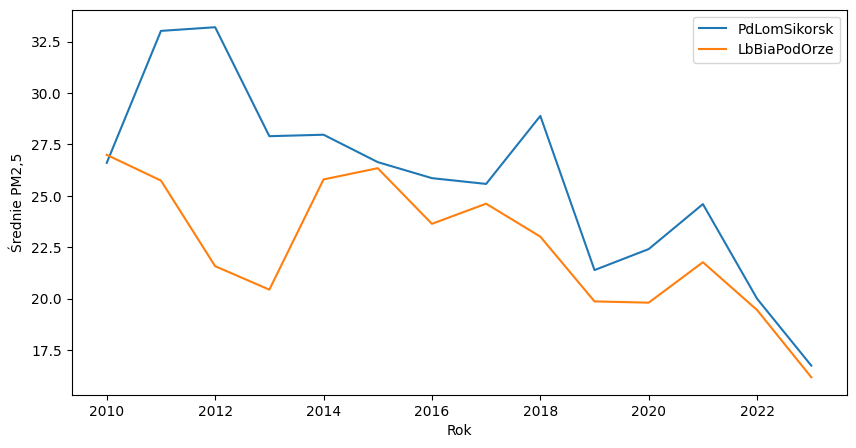

In [34]:
x1 = df[df['Kod stacji'] == 'PdLomSikorsk']['Rok']
y1 = df[df['Kod stacji'] == 'PdLomSikorsk']['Średnia']

x2 = df[df['Kod stacji'] == 'LbBiaPodOrze']['Rok']
y2 = df[df['Kod stacji'] == 'LbBiaPodOrze']['Średnia']

plt.figure(figsize=(10, 5))

plt.plot(x1, y1, label='PdLomSikorsk')
plt.plot(x2, y2, label='LbBiaPodOrze')

plt.xlabel('Rok')
plt.ylabel('Średnie PM2,5')
plt.legend()

plt.show()



W obu stacjach ilość pyłku PM2,5 spada na przestrzeni lat sugerując poprawę jakości powietrza.

/tmp/ipykernel_11099/2044817371.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=df['Rok'].unique())


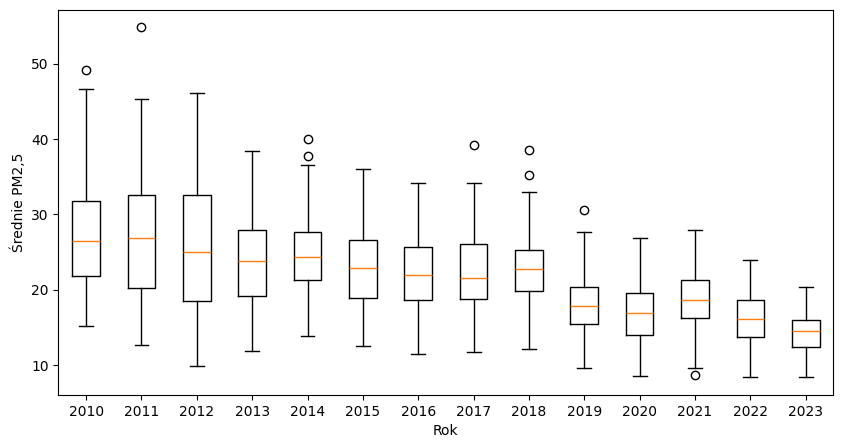

In [35]:
data = [df[df['Rok'] == rok]['Średnia'] for rok in df['Rok'].unique()]

plt.figure(figsize=(10, 5))
plt.boxplot(data, labels=df['Rok'].unique())
plt.xlabel('Rok')
plt.ylabel('Średnie PM2,5')
plt.show()

Zarówno średnia wartość jak i rozstrzał znacząco spadają na przestrzeni lat, sugerując poprawę jakości powietrza.

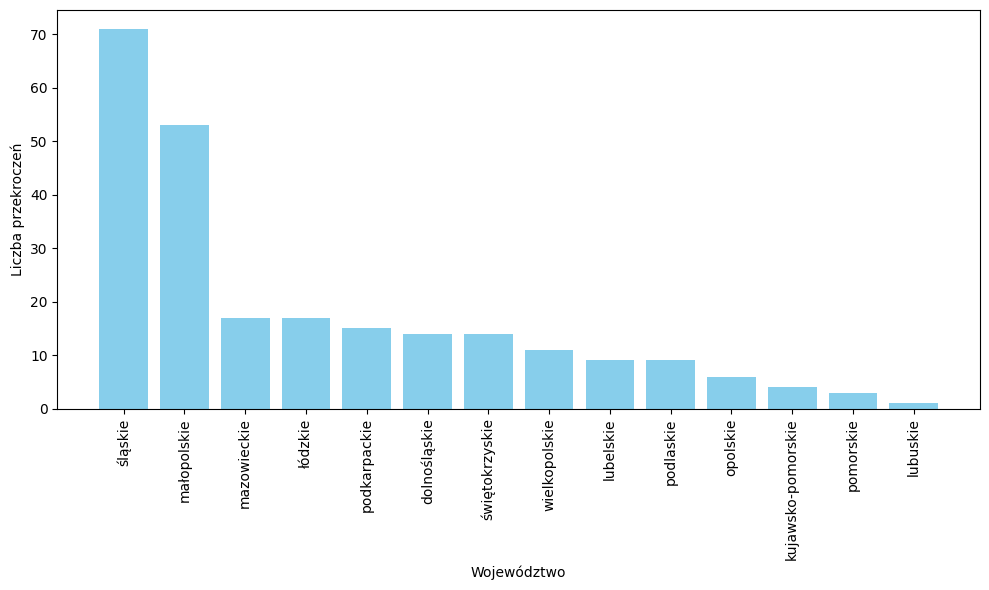

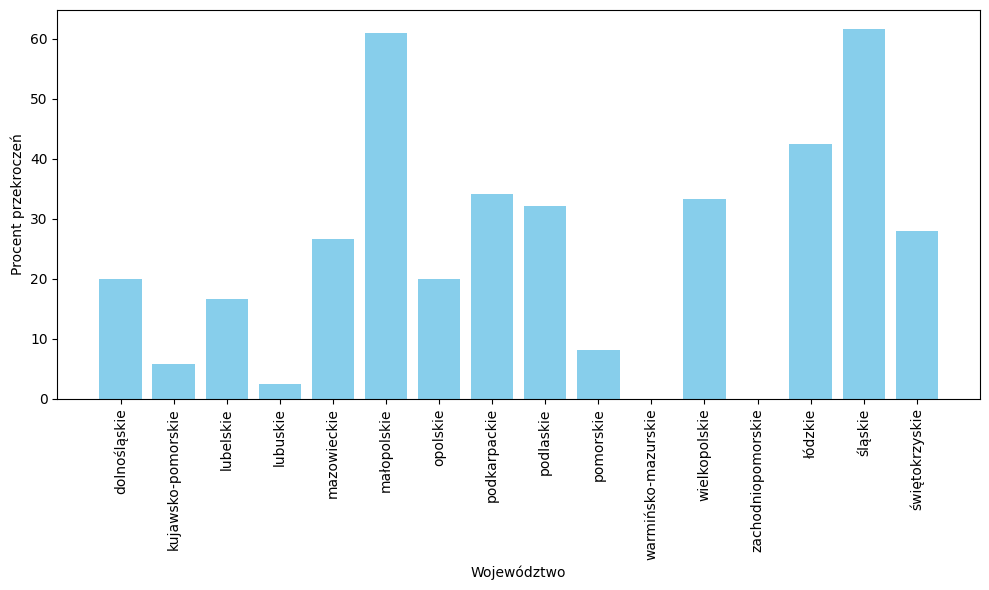

In [45]:
exceeding = df[df['Średnia'] > 25]
count = exceeding['Województwo'].value_counts()
count_df = pd.DataFrame({'Województwo': count.index, 'Count': count.values})

plt.figure(figsize=(10, 6))
plt.bar(count_df['Województwo'], count_df['Count'], color='skyblue')
plt.xlabel('Województwo')
plt.ylabel('Liczba przekroczeń')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

percentage = (count / df['Województwo'].value_counts()) * 100
percentage_df = pd.DataFrame({'Województwo': percentage.index, 'Percentage': percentage.values})

plt.figure(figsize=(10, 6))
plt.bar(percentage_df['Województwo'], percentage_df['Percentage'], color='skyblue')
plt.xlabel('Województwo')
plt.ylabel('Procent przekroczeń')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



Najwięcej przekroczeń mają województwa małopolskie i śląskie, ponad 60% obserwacji. Najmniej warmińsko-mazurskie i zachodniopomorskie gdzie nie przekroczono normy ani razu. Można zauważyć że województwo łódzkie ma stosunkowo duży procent przekroczeń pomimo niepozornej liczby przekroczeń, co sugeruje że jest tam mało stacji badawczych.